In [1]:
from sklearn.preprocessing import LabelEncoder
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

notebook_dir = Path.cwd()
project_dir = notebook_dir.parent
# Add project directory to system path
if project_dir.exists():
    sys.path.append(str(project_dir))
else:
    raise FileNotFoundError(f"Project directory not found: {project_dir}")

# Import custom modules
try:
    from modules.data_prep import load_data, handle_skewed_columns
    from modules.plotting import (
        plot_correlation_matrix,
        plot_boxplot,
        plot_categorical_distributions,
        plot_dist,
        analyze_correlations,
    )
    from modules.feature_engineering import Winsorizer
except ModuleNotFoundError as e:
    raise ImportError(f"Error importing modules: {e}")



In [2]:
# Load the raw dataset using the load_data function
df = load_data()
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### Data Description and Key Insights

#### Key Variables Overview

| **Feature**                         | **Description**                                                                                  |
|-------------------------------------|--------------------------------------------------------------------------------------------------|
| **Marital Status**                  | Categorical variable encoded as numerical; mode: 1 (Single). Reflects the marital status of the student. |
| **Course**                          | Categorical variable encoded as numerical; mode: 10. Represents the course or program enrolled in by the student. |
| **Daytime/Evening Attendance**      | Binary categorical variable encoded as numerical; mode: 1 (Daytime). Indicates whether the student attends classes during the day or evening. |
| **Previous Qualification**          | Categorical variable encoded as numerical; mode: 1. Represents the qualification obtained before enrolling in higher education (e.g., high school diploma). |
| **Nationality**                     | Categorical variable encoded as numerical; mode: 1 (Local students). Reflects the nationality of the student. |
| **Mother's Qualification**          | Categorical variable encoded as numerical; mode: 1. Indicates the level of education completed by the student's mother. |
| **Educational Special Needs**       | Binary categorical variable encoded as numerical; mode: 0 (No). Indicates if the student has any special educational needs. |
| **Debtor**                          | Binary categorical variable encoded as numerical; mode: 0 (No). Indicates if the student owes unpaid tuition fees. |
| **Tuition Fees Up to Date**         | Binary categorical variable encoded as numerical; mode: 1 (Yes). Indicates whether the student's tuition fees are current. |
| **Gender**                          | Binary categorical variable encoded as numerical; mode: 0. Represents the gender of the student. |
| **Scholarship Holder**              | Binary categorical variable encoded as numerical; mode: 0 (No). Indicates whether the student receives a scholarship. |
| **Age at Enrollment**               | Numerical variable; mean age is approximately 23.3 years. Represents the age of the student at the time of enrollment. |
| **International**                   | Binary categorical variable encoded as numerical; mode: 0 (No). Indicates if the student is an international student. |
| **Curricular Units 1st Sem (Approved)** | Numerical variable; mean number of units approved is 4.71. Refers to the number of curricular units approved by the student in the first semester. |
| **Curricular Units 1st Sem (Grade)** | Numerical variable; mean grade is approximately 10.6. Indicates the grade achieved in the first semester. |
| **Unemployment Rate**               | Numerical variable; mean unemployment rate is approximately 11.6%. Reflects the national unemployment rate during the period of study. |
| **Inflation Rate**                  | Numerical variable; mean inflation rate is approximately 1.23%. Represents the national inflation rate during the period of study. |
---

###Some notes:
1. **Categorical Variables**: Variables like *Marital Status* and *Course* are summarized using their mode for better interpretability.
2. **Numerical Variables**: Academic and demographic features such as *Age at Enrollment* are summarized using the mean, providing insights into central tendencies.
3. **Academic Metrics**: Features such as *Curricular Units Approved* are key indicators of academic performance and progress.
4. **Economic Context**: Variables like *Unemployment Rate* reflect external factors that may influence student outcomes.
5. **Target Variable**: The dataset aims to predict outcomes like *Dropout*, *Graduate*, or *Enrolled*, influenced by a combination of academic, demographic, and economic factors.



In [3]:
# Check the data types of each column
print("Data Types:")
print(df.dtypes)

# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  
print("\nMissing Values:")
print(missing_values)

if missing_values.empty:
    print("\nNo missing values in the dataset.")
else:
    missing_percentage = (missing_values / len(df)) * 100
    print("\nPercentage of Missing Values:")
    print(missing_percentage)


Data Types:
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Ag

### All columns are either int64 or float64, with no missing values, indicating a complete dataset with consistent data types.

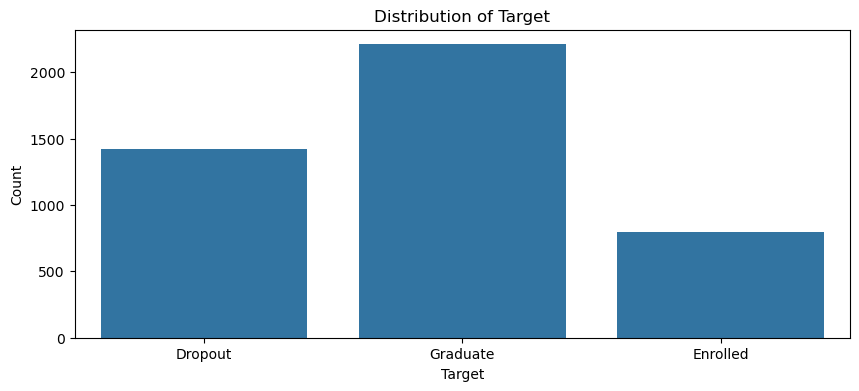

In [4]:
plot_categorical_distributions(df)

# Distribution of Target Variable

This bar chart illustrates the distribution of the target variable, showing the frequency of students categorized into Dropout, Graduate, or Enrolled.

### Key Observations:
- **Majority Class**: The largest group is Graduate, indicating most students complete their studies successfully.
- **Dropout Rate**: A significant number of students are classified as Dropout, showing a notable portion leave before completing their studies.
- **Enrolled Group**: This category is the smallest, representing students currently in the process of completing their education.

### Insights:
- There may be an imbalance in the dataset with Graduate being the dominant class, compared to dropouts and enrolled students.
- Understanding why students dropout or remain enrolled could be crucial for prediction and intervention strategies.


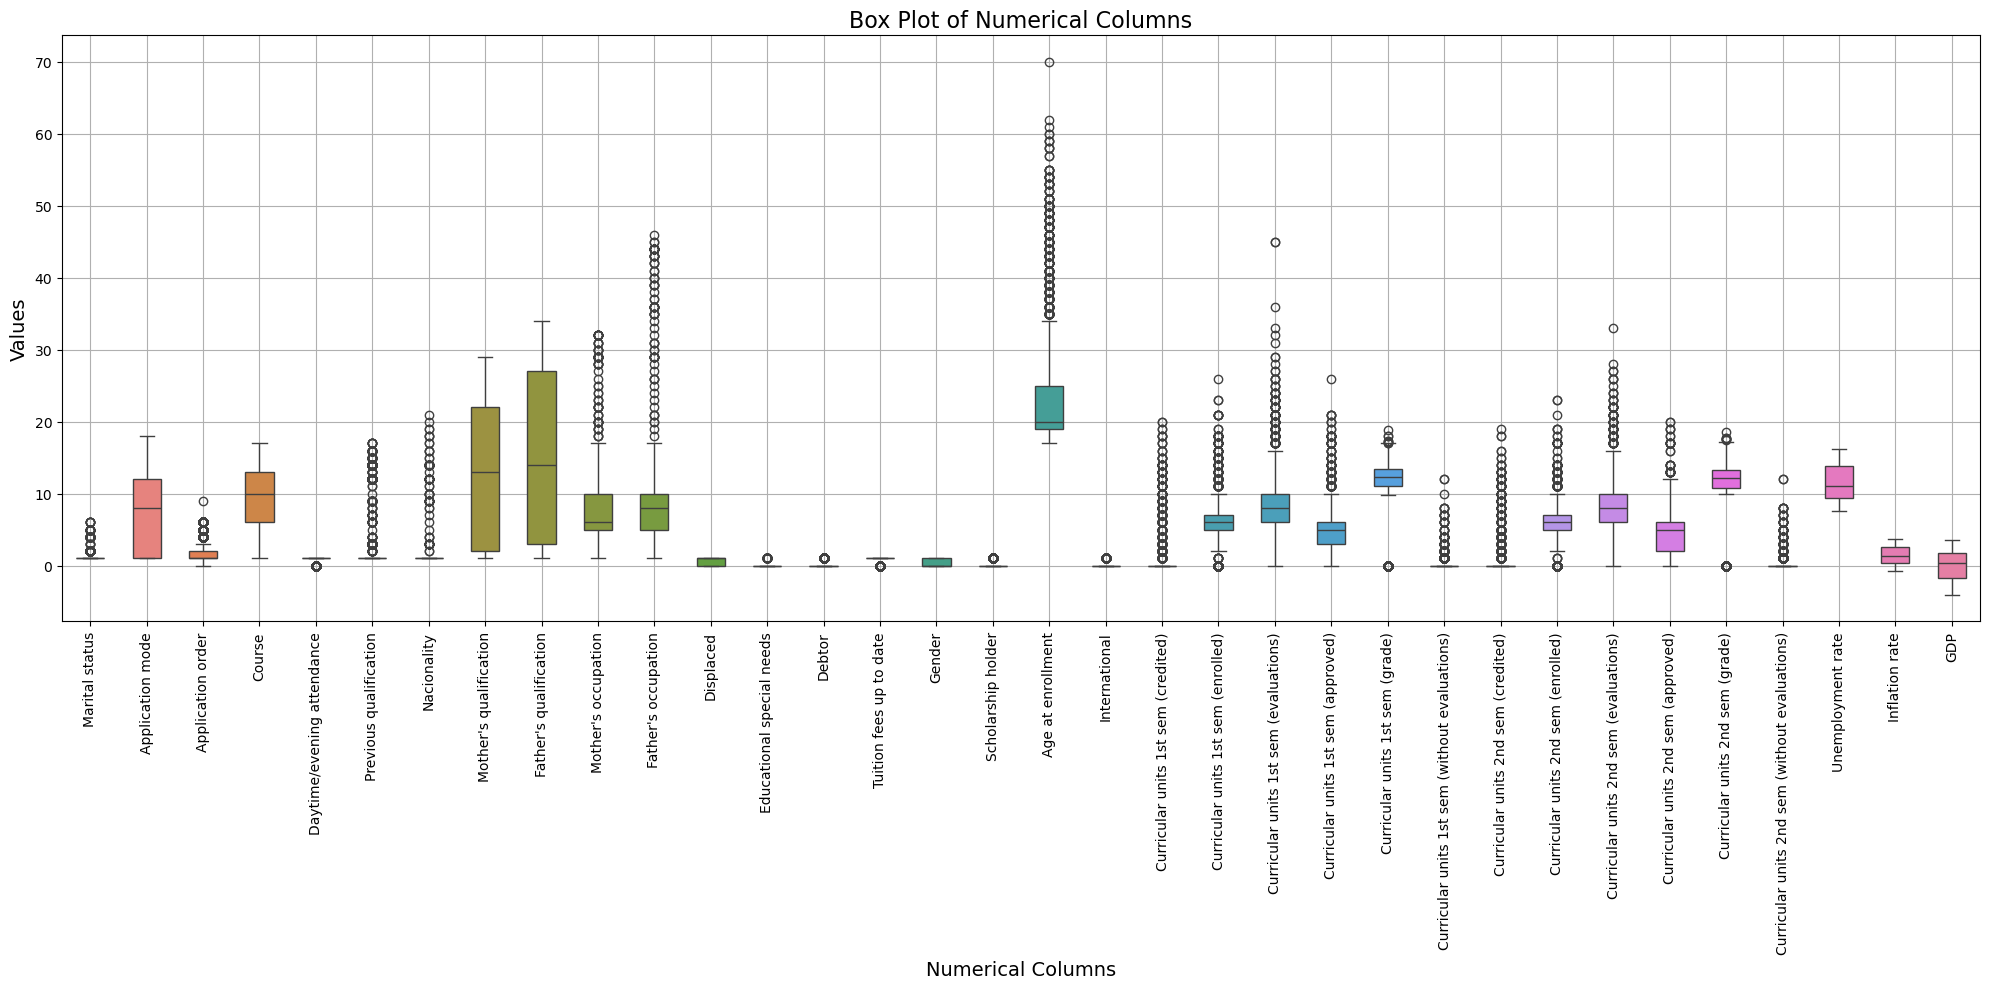

In [5]:
plot_boxplot(df)

### Key Observations from Boxplot

#### **1. Academic Performance Variables**
- **Curricular Units (1st and 2nd Semester)**:
  - *Enrolled, Evaluations, Approved, Grade*: 
    - Significant variability across these features, with most values clustering around lower to moderate levels.
    - Potential outliers, indicating unusual cases. (Required actions for outliers)


#### **2. Socioeconomic Variables**
- **Parents’ Qualifications**:
  - *Mother’s and Father’s Qualifications*: 
    - Show wide variability, reflecting diverse parental educational backgrounds which indicating the possible presence of outliers. 

- **Scholarship Holder**:
  - The binary distribution shows most students are not on scholarships, but a notable minority receives them.

#### **3. Demographics**
- **Age at Enrollment**:
  - Most students are clustered around typical enrollment ages, but potential outliers indicate the presence of mature or early-entry students. (Required actions for outliers)

- **International**:
  - The majority are local students, with a small proportion of international students reflected in the distribution.

#### **4. Economic Indicators**
- **Unemployment Rate, Inflation Rate, and GDP**:
  - These variables show moderate variability.

---


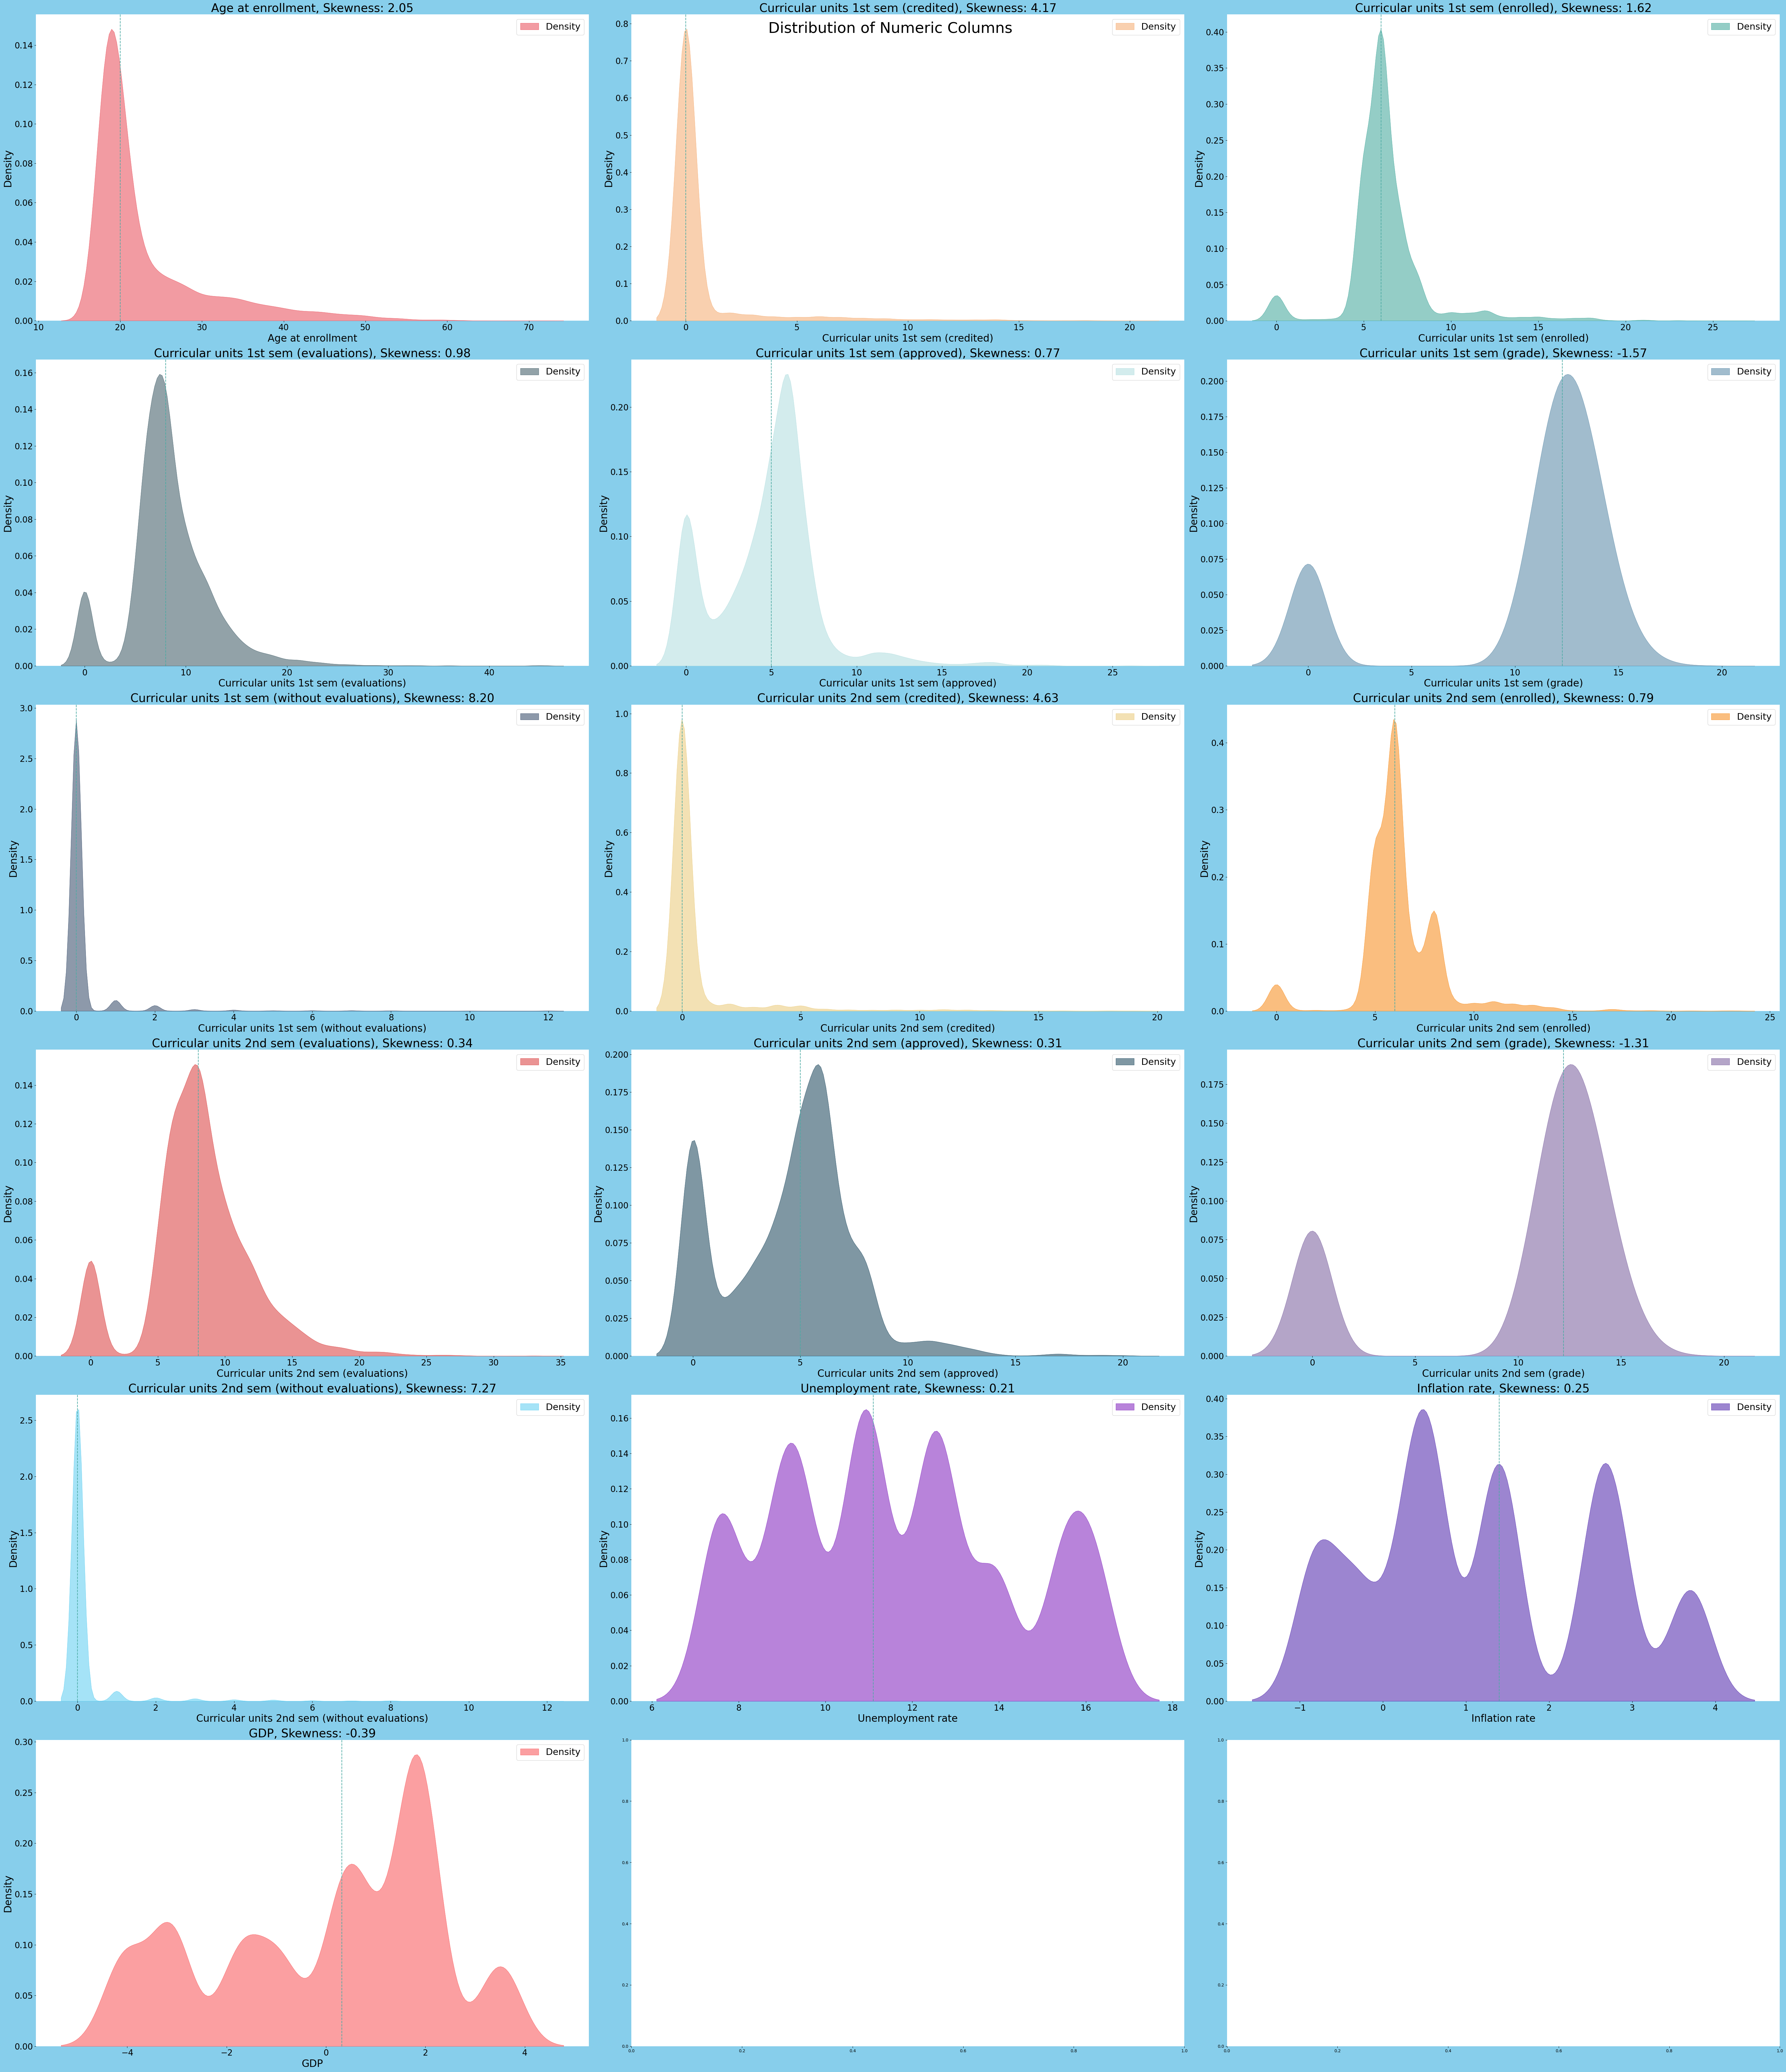

In [6]:
plot_dist(dataset=df, rows=6, cols=3)

### Distribution of Numeric Columns (with Skewness)

#### Significant Observations:
1. **Curricular Units (1st and 2nd Semesters)**:
   - **Skewness for Credits, Evaluations, and Grades**:
     - `Curricular units 1st sem (credited)`: Skewness = 4.17, indicating a large concentration at lower credit values.
     - `Curricular units 1st sem (grade)`: Skewness = -1.57, showing a slight left skew, with higher performance concentrated among fewer students.
     - `Curricular units 2nd sem (credited)`: Skewness = 4.63, similar to the 1st semester, reflecting a disparity in credits earned.
     - `Curricular units 2nd sem (grade)`: Skewness = -1.13, showing moderate concentration toward higher grades.

2. **Demographics**:
   - **Age at Enrollment**:
     - Skewness = 2.05, with most students concentrated at typical college enrollment ages, but some outliers represent older students.
3. **Economic Indicators**:
   - **GDP**:
     - Skewness = -0.39, nearly symmetric, indicating consistent economic performance during the data collection period.
   - **Inflation Rate**:
     - Skewness = 0.25, showing a relatively normal distribution with a slight right skew.
   - **Unemployment Rate**:
     - Skewness = 0.21, slightly right-skewed, suggesting stable economic conditions for most students.

---



Correlation with Target:>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Target                                            1.000000
Curricular units 2nd sem (approved)               0.624157
Curricular units 2nd sem (grade)                  0.566827
Curricular units 1st sem (approved)               0.529123
Curricular units 1st sem (grade)                  0.485207
Tuition fees up to date                           0.409827
Scholarship holder                                0.297595
Curricular units 2nd sem (enrolled)               0.175847
Curricular units 1st sem (enrolled)               0.155974
Displaced                                         0.113986
Curricular units 2nd sem (evaluations)            0.092721
Application order                                 0.089791
Daytime/evening attendance                        0.075107
Curricular units 2nd sem (credited)               0.054004
Father's occupation                               0.051702
Mother's occupation                               0.04

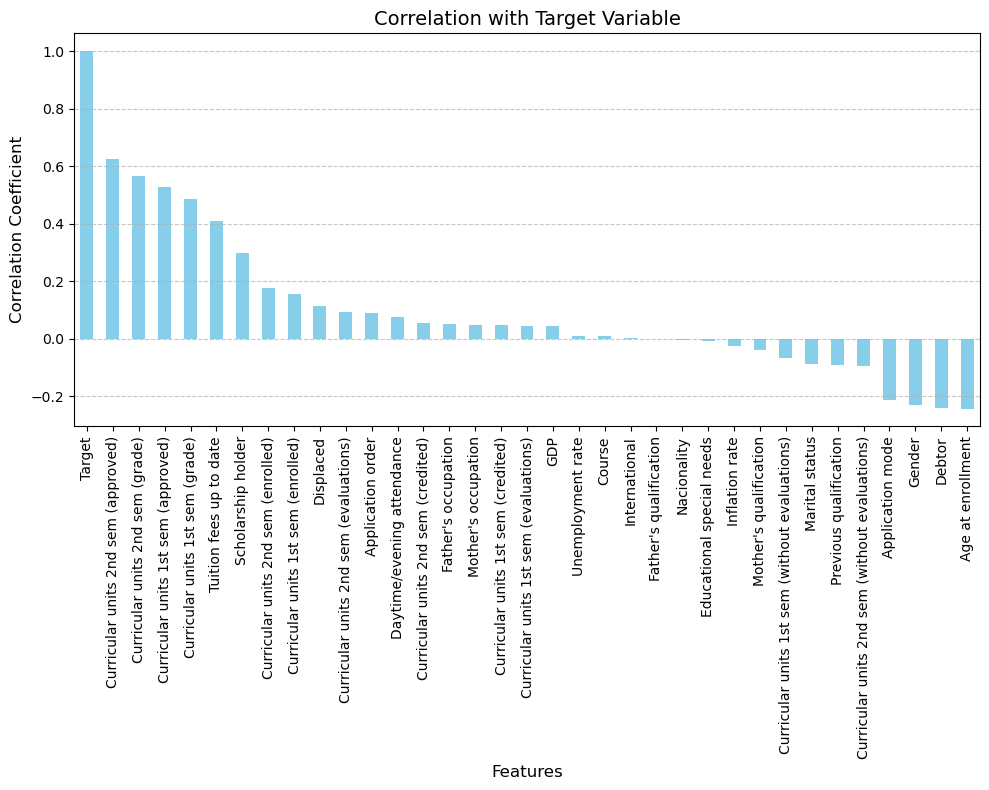

['Marital status', 'Application order', 'Course', 'Daytime/evening attendance', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Educational special needs', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Unemployment rate', 'Inflation rate', 'GDP']


In [7]:
label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])
highly_corr, less_corr = analyze_correlations(data=df, target_column='Target',
                                              high_corr_threshold=0.7, low_corr_threshold=0.09)
print(less_corr)

# Key Correlation Insights

## 1. Key Predictors of the Target Variable
- **Curricular units 2nd sem (approved)** (Correlation: 0.624) and **Curricular units 2nd sem (grade)** (Correlation: 0.567) are the strongest predictors of the target variable. These highlight the importance of academic performance in the second semester for predicting student outcomes.
- **Curricular units 1st sem (approved)** (Correlation: 0.529) and **Curricular units 1st sem (grade)** (Correlation: 0.485) also show strong positive correlations with the target, indicating consistent academic performance across semesters is critical.

## 2. Financial Indicators
- **Tuition fees up to date** (Correlation: 0.410) shows a moderate positive correlation with the target variable, suggesting students who keep their financial obligations current are more likely to succeed.

## 3. Weakly Correlated Features
- **Age at enrollment** (Correlation: -0.243) shows a slight negative correlation with the target, indicating younger students tend to perform slightly better academically.

## 4. Analysis of Irrelevant Variables. 
The features with low absolute correlation values (below 0.09) may not provide significant predictive power for the target variable 'Target.' By removing these variables, the dataset can be simplified, potentially improving computational efficiency and model interpretability without sacrificing performance.


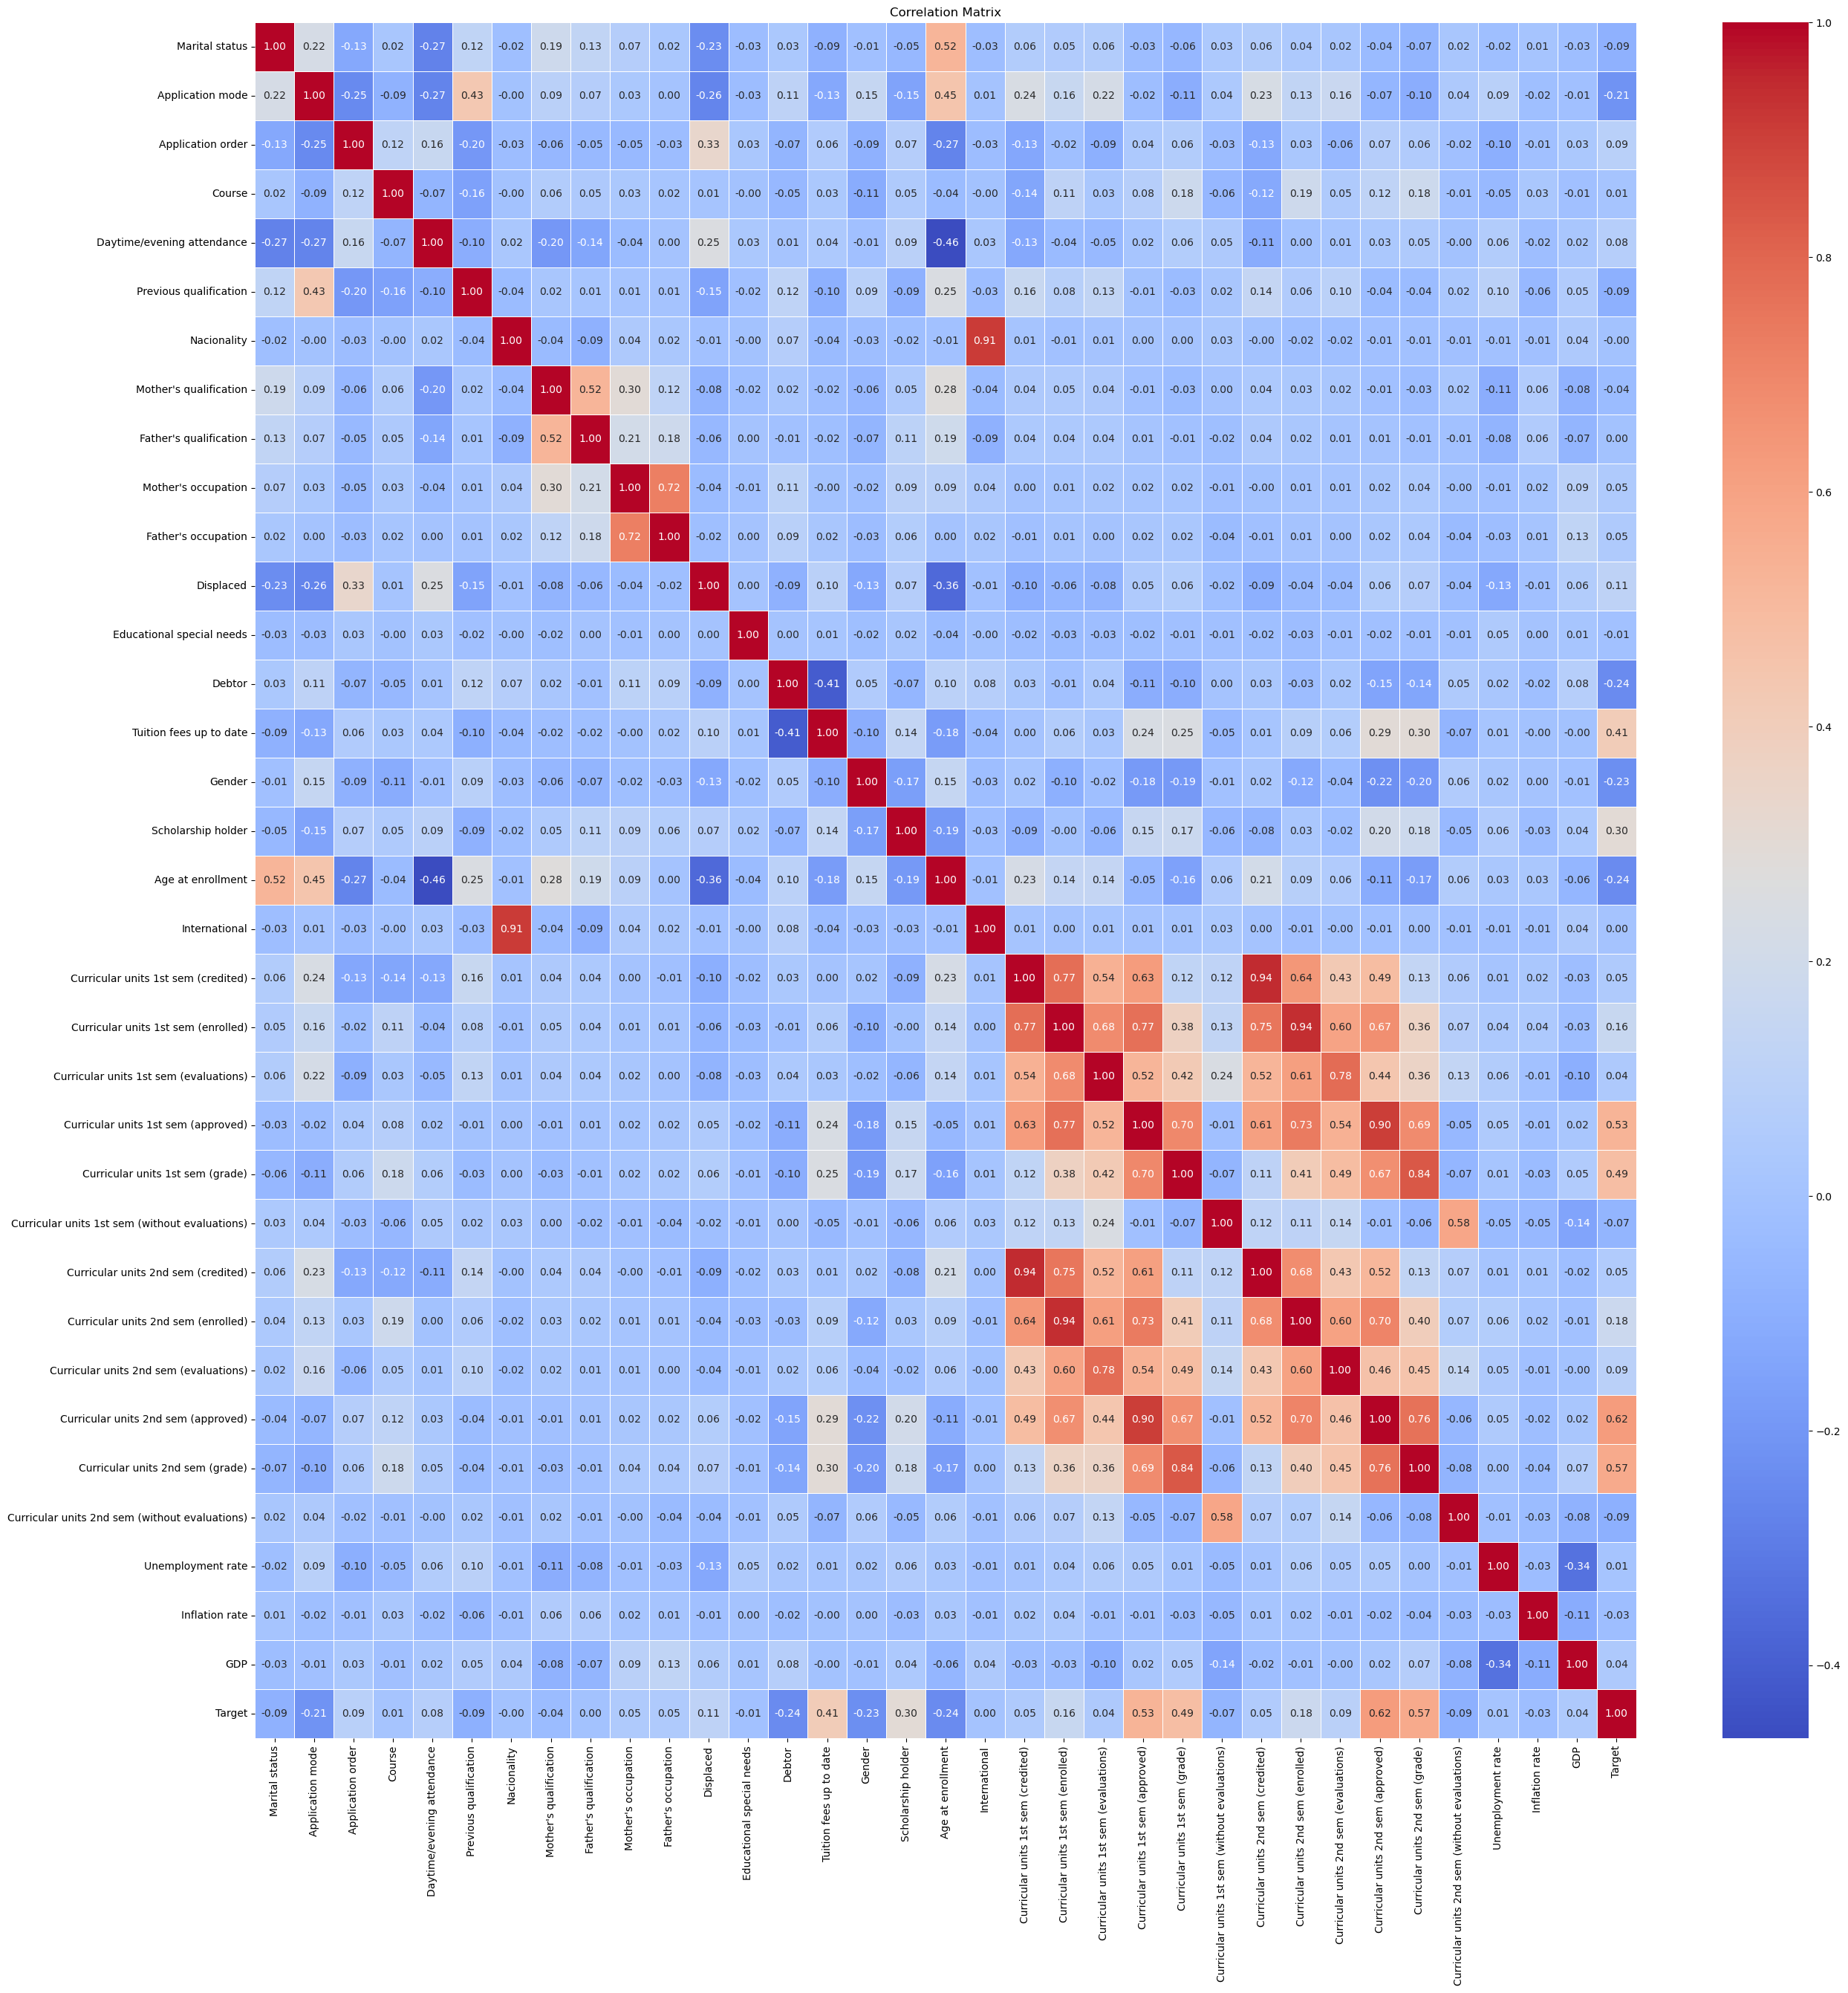

In [8]:
plot_correlation_matrix(df, figsize=(30, 30))

## Correlation Matrix Analysis and Interaction Creation

---

### Observations:
The correlation matrix highlights significant relationships between features in the dataset. 

---

### Key High-Correlation Insights:
1. **Curricular units 1st sem (approved)** and **Curricular units 1st sem (grade)**:  
   - Correlation = **0.70**.  
   - Suggests a strong relationship between approved units and grades in the first semester.  

2. **Curricular units 2nd sem (approved)** and **Curricular units 2nd sem (grade)**:  
   - Correlation = **0.76**.  
   - Reflects a robust connection between approved units and grades in the second semester.  

---



In [9]:
## Data Cleaning

#Load the raw dataset
df = load_data()
# Rename the colunmns
df.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age'}, inplace = True)
#Encode the Target variable
df['Target'] = df['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})
# Add `IDpol` column for the further split
df["IDpol"] = range(1, len(df) + 1)
df["IDpol"] = df["IDpol"].astype(np.int64)
print(df.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployme

In [10]:
#Based on the calculation in the EDA, remove less relevant features (Correlation smaller than 0.09)
features_to_remove = ['Marital status', 'Course', 'Daytime/evening attendance', 
                      "Mother's occupation", "Father's occupation", 'Curricular units 1st sem (credited)', 
                      'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (without evaluations)', 
                      'Curricular units 2nd sem (credited)', 'GDP']


df = df.drop(columns=features_to_remove)
print(df.columns)

Index(['Application mode', 'Application order', 'Previous qualification',
       'Nationality', 'Mother's qualification', 'Father's qualification',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age',
       'International', 'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'Target', 'IDpol'],
      dtype='object')


Processing Curricular units 2nd sem (grade)...
Processing Curricular units 1st sem (enrolled)...
Processing Curricular units 2nd sem (without evaluations)...
Processing Curricular units 2nd sem (approved)...
Processing Age...
Processing Curricular units 1st sem (grade)...
Processing Curricular units 2nd sem (enrolled)...
Processing Curricular units 2nd sem (evaluations)...
Processing Curricular units 1st sem (approved)...


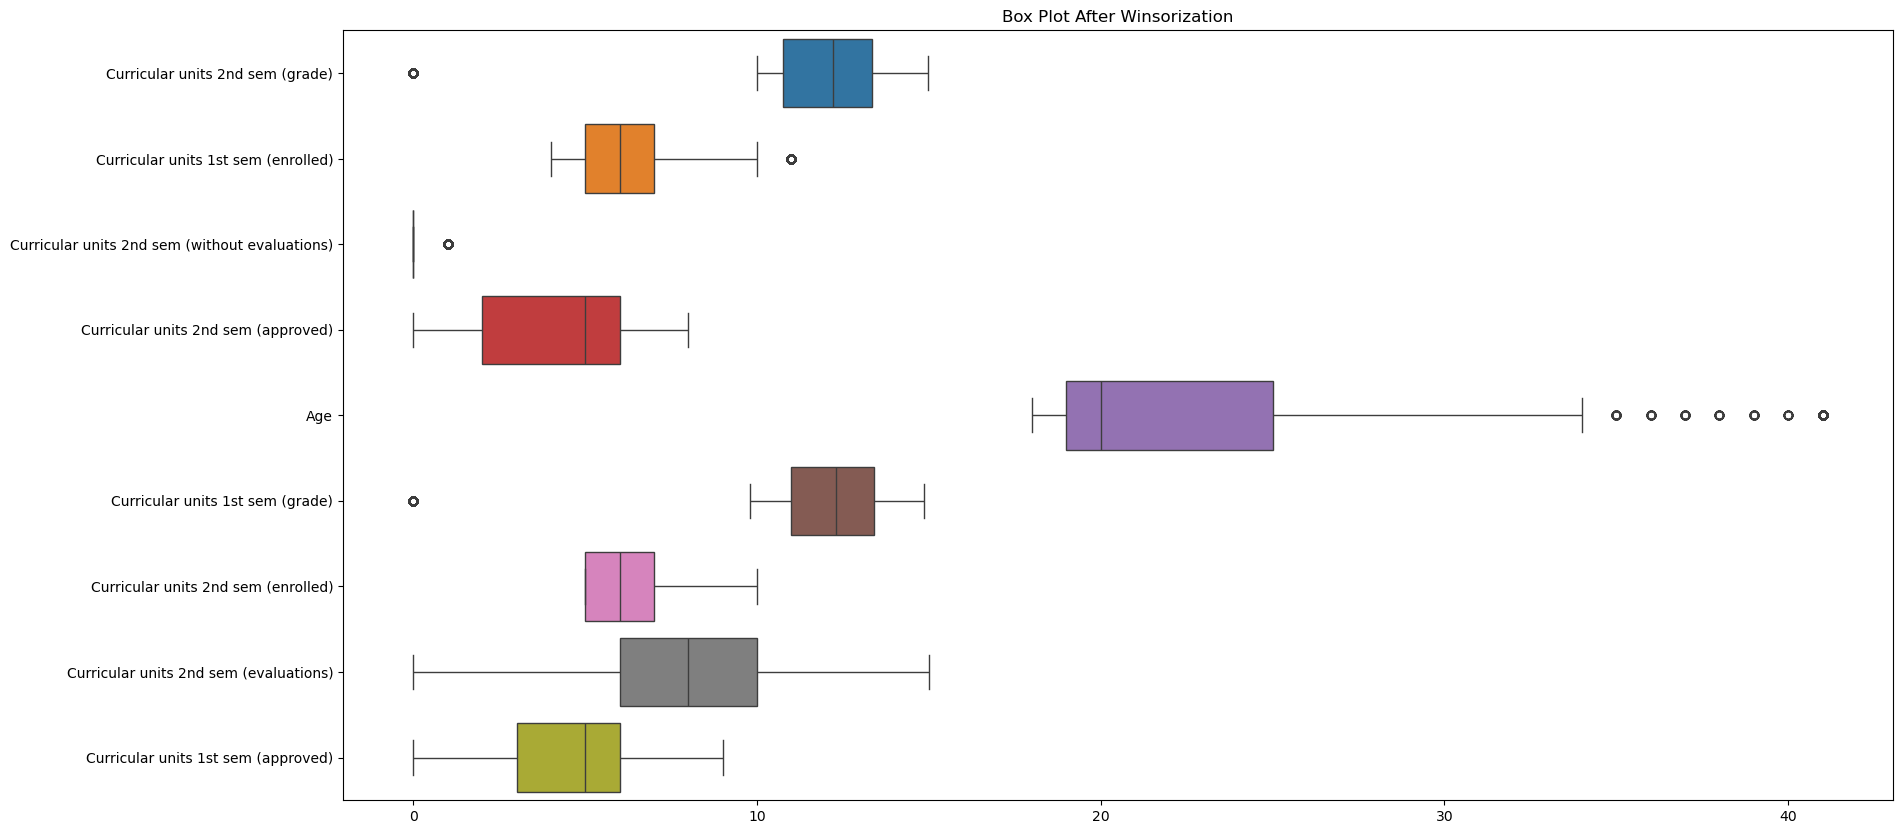

In [11]:
# Handling the outliers

numericals = ['Curricular units 2nd sem (grade)', 'Curricular units 1st sem (enrolled)', 
              'Curricular units 2nd sem (without evaluations)', 'Curricular units 2nd sem (approved)', 
              'Age', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)', 
              'Curricular units 2nd sem (evaluations)', 
              'Curricular units 1st sem (approved)']
variables_to_winsorize = numericals

# Use Winsorizer to cap
winsorizer = Winsorizer(lower_quantile=0.05, upper_quantile=0.95)
for variable in variables_to_winsorize:
    print(f"Processing {variable}...")
    winsorizer.fit(df[variable])
    df[variable] = winsorizer.transform(df[variable])

# Plot box plots again to check changes
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[variables_to_winsorize], orient='h')
plt.title("Box Plot After Winsorization")
plt.show()



# Outlier Analysis with Box Plots

## Analysis Before and After Winsorization

### 1. Observations Before Handling Outliers
- **Box Plot Before Winsorization**:
  - Several numerical columns exhibit significant outliers, indicated by data points far from the whiskers.
  - **Curricular units** (both 1st and 2nd semester metrics): These features have extreme values in both directions, suggesting a mix of students with exceptionally high or low performances.
  - **Age**:
    - Displays a long tail with a few extreme values. These points could represent older students, possibly indicating a return to education later in life or specific exceptional cases.
  - Outliers in these variables can distort the model's understanding and lead to suboptimal predictions.

### 2. Winsorization Approach
- Winsorization was applied with the following parameters:
  - **Lower Quantile**: 0.05 (5th percentile)
  - **Upper Quantile**: 0.95 (95th percentile)

### 3. Observations After Handling Outliers
- **Box Plot After Winsorization**:
  - The extreme outliers have been clipped to the 5th and 95th percentiles.
  - **Curricular Units (1st and 2nd semesters)**:
    - Outliers have been capped, leading to a more compact and representative range of values.
    - This ensures that extreme performance differences among students are still preserved without distorting the overall scale.
  - **Age**:
    - The Winsorization was conservatively applied to avoid losing critical information. A few extreme values were retained to reflect the possibility of older students contributing valuable data.

In [12]:
## Handle skewed numerical columns in a DataFrame by applying log transformation.
numericals = ['Curricular units 2nd sem (grade)', 'Curricular units 1st sem (enrolled)', 
              'Curricular units 2nd sem (without evaluations)', 'Curricular units 2nd sem (approved)', 
              'Age', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)', 
              'Curricular units 2nd sem (evaluations)', 
              'Curricular units 1st sem (approved)']

handle_skewed_columns(df, numericals)


,Application mode,Application order,Previous qualification,Nationality,Mother's qualification,Father's qualification,Displaced,Educational special needs,Debtor,Tuition fees up to date,...,Unemployment rate,Inflation rate,Target,IDpol,Curricular units 2nd sem (grade)_log,Curricular units 1st sem (enrolled)_log,Curricular units 2nd sem (without evaluations)_log,Age_log,Curricular units 1st sem (grade)_log,Curricular units 2nd sem (enrolled)_log
0,8,5,1,1,13,10,1,0,0,1,...,10.8,1.4,0,1,0.000000,1.609438,0.0,3.044522,0.000000,1.791759
1,6,1,1,1,1,3,1,0,0,0,...,13.9,-0.3,2,2,2.685577,1.945910,0.0,2.995732,2.708050,1.945910
2,1,5,1,1,22,27,1,0,0,0,...,10.8,1.4,0,3,0.000000,1.945910,0.0,2.995732,0.000000,1.945910
3,8,2,1,1,23,27,1,0,0,1,...,9.4,-0.8,2,4,2.595255,1.945910,0.0,3.044522,2.669210,1.945910
4,12,1,1,1,22,28,0,0,0,1,...,13.9,-0.3,2,5,2.639057,1.945910,0.0,3.737670,2.590267,1.945910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,6,1,1,1,1,0,0,0,1,...,15.5,2.8,2,4420,2.614960,1.945910,0.0,2.995732,2.681022,1.945910
4420,1,2,1,19,1,1,1,0,1,0,...,11.1,0.6,0,4421,2.484907,1.945910,0.0,2.944439,2.564949,1.945910
4421,1,1,1,1,22,27,1,0,0,1,...,13.9,-0.3,0,4422,2.674149,2.079442,0.0,3.433987,2.763620,2.197225
4422,1,1,1,1,22,27,1,0,0,1,...,9.4,-0.8,2,4423,2.564949,1.791759,0.0,3.044522,2.694627,1.791759


In [13]:
# Save the cleaned dataset
project_dir  = notebook_dir.parent
data_dir = project_dir / "data"
output_file = data_dir / "cleaned_dataset.parquet"
data_dir.mkdir(parents=True, exist_ok=True)
df.to_parquet(output_file, index=False)
print(f"Data cleaning completed and saved to {output_file}")



Data cleaning completed and saved to /Users/jiahaoyuan/Desktop/D100_Project/Project/data/cleaned_dataset.parquet
